## Import Libraries

In [1]:
import requests as req
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Download Data

In [2]:
resp = req.get('https://services.arcgis.com/njFNhDsUCentVYJW/arcgis/rest/services/MASTERCaseTracker/FeatureServer/0/query?f=json&where=1%3D1&returnGeometry=false&spatialRel=esriSpatialRelIntersects&outFields=*&orderByFields=ReportDate%20asc&resultOffset=0&resultRecordCount=32000&resultType=standard&cacheHint=true')

In [3]:
rawData = resp.json()

## Fix Data

Convert NoneTypes to zeros.
Calculate case deltas from totals.

## Build Dataframe

In [4]:
covdf = pd.DataFrame(columns=[
    '0 to 9','10 to 19','20 to 29','30 to 39','40 to 49','50 to 59','60 to 69','70 to 79','80 plus'
])

for i in range(0, len(rawData['features'])):
  idx = pd.to_datetime(rawData['features'][i]['attributes']["ReportDate"] * 1000000)
  #Fix NoneTypes
  if rawData['features'][i]['attributes']['case0to9'] is None:
    rawData['features'][i]['attributes']['case0to9'] = 0

  if rawData['features'][i]['attributes']['case10to19'] is None:
    rawData['features'][i]['attributes']['case10to19'] = 0

  if rawData['features'][i]['attributes']['case20to29'] is None:
    rawData['features'][i]['attributes']['case20to29'] = 0

  if rawData['features'][i]['attributes']['case30to39'] is None:
    rawData['features'][i]['attributes']['case30to39'] = 0
    
  if rawData['features'][i]['attributes']['case40to49'] is None:
    rawData['features'][i]['attributes']['case40to49'] = 0
    
  if rawData['features'][i]['attributes']['case50to59'] is None:
    rawData['features'][i]['attributes']['case50to59'] = 0
    
  if rawData['features'][i]['attributes']['case60to69'] is None:
    rawData['features'][i]['attributes']['case60to69'] = 0

  if rawData['features'][i]['attributes']['case70to79'] is None:
    rawData['features'][i]['attributes']['case70to79'] = 0

  if rawData['features'][i]['attributes']['case80plus'] is None:
    rawData['features'][i]['attributes']['case80plus'] = 0

    
  covdf.loc[idx] = [
      (rawData['features'][i]['attributes']['case0to9'] if i == 0 else rawData['features'][i]['attributes']['case0to9'] - rawData['features'][i - 1]['attributes']['case0to9']),
      (rawData['features'][i]['attributes']['case10to19'] if i == 0 else rawData['features'][i]['attributes']['case10to19'] - rawData['features'][i - 1]['attributes']['case10to19']),
      (rawData['features'][i]['attributes']['case20to29'] if i == 0 else rawData['features'][i]['attributes']['case20to29'] - rawData['features'][i - 1]['attributes']['case20to29']),
      (rawData['features'][i]['attributes']['case30to39'] if i == 0 else rawData['features'][i]['attributes']['case30to39'] - rawData['features'][i - 1]['attributes']['case30to39']),
      (rawData['features'][i]['attributes']['case40to49'] if i == 0 else rawData['features'][i]['attributes']['case40to49'] - rawData['features'][i - 1]['attributes']['case40to49']),
      (rawData['features'][i]['attributes']['case50to59'] if i == 0 else rawData['features'][i]['attributes']['case50to59'] - rawData['features'][i - 1]['attributes']['case50to59']),
      (rawData['features'][i]['attributes']['case60to69'] if i == 0 else rawData['features'][i]['attributes']['case60to69'] - rawData['features'][i - 1]['attributes']['case60to69']),
      (rawData['features'][i]['attributes']['case70to79'] if i == 0 else rawData['features'][i]['attributes']['case70to79'] - rawData['features'][i - 1]['attributes']['case70to79']),
      (rawData['features'][i]['attributes']['case80plus'] if i == 0 else rawData['features'][i]['attributes']['case80plus'] - rawData['features'][i - 1]['attributes']['case80plus'])
  ]

## Make Chart

<AxesSubplot:>

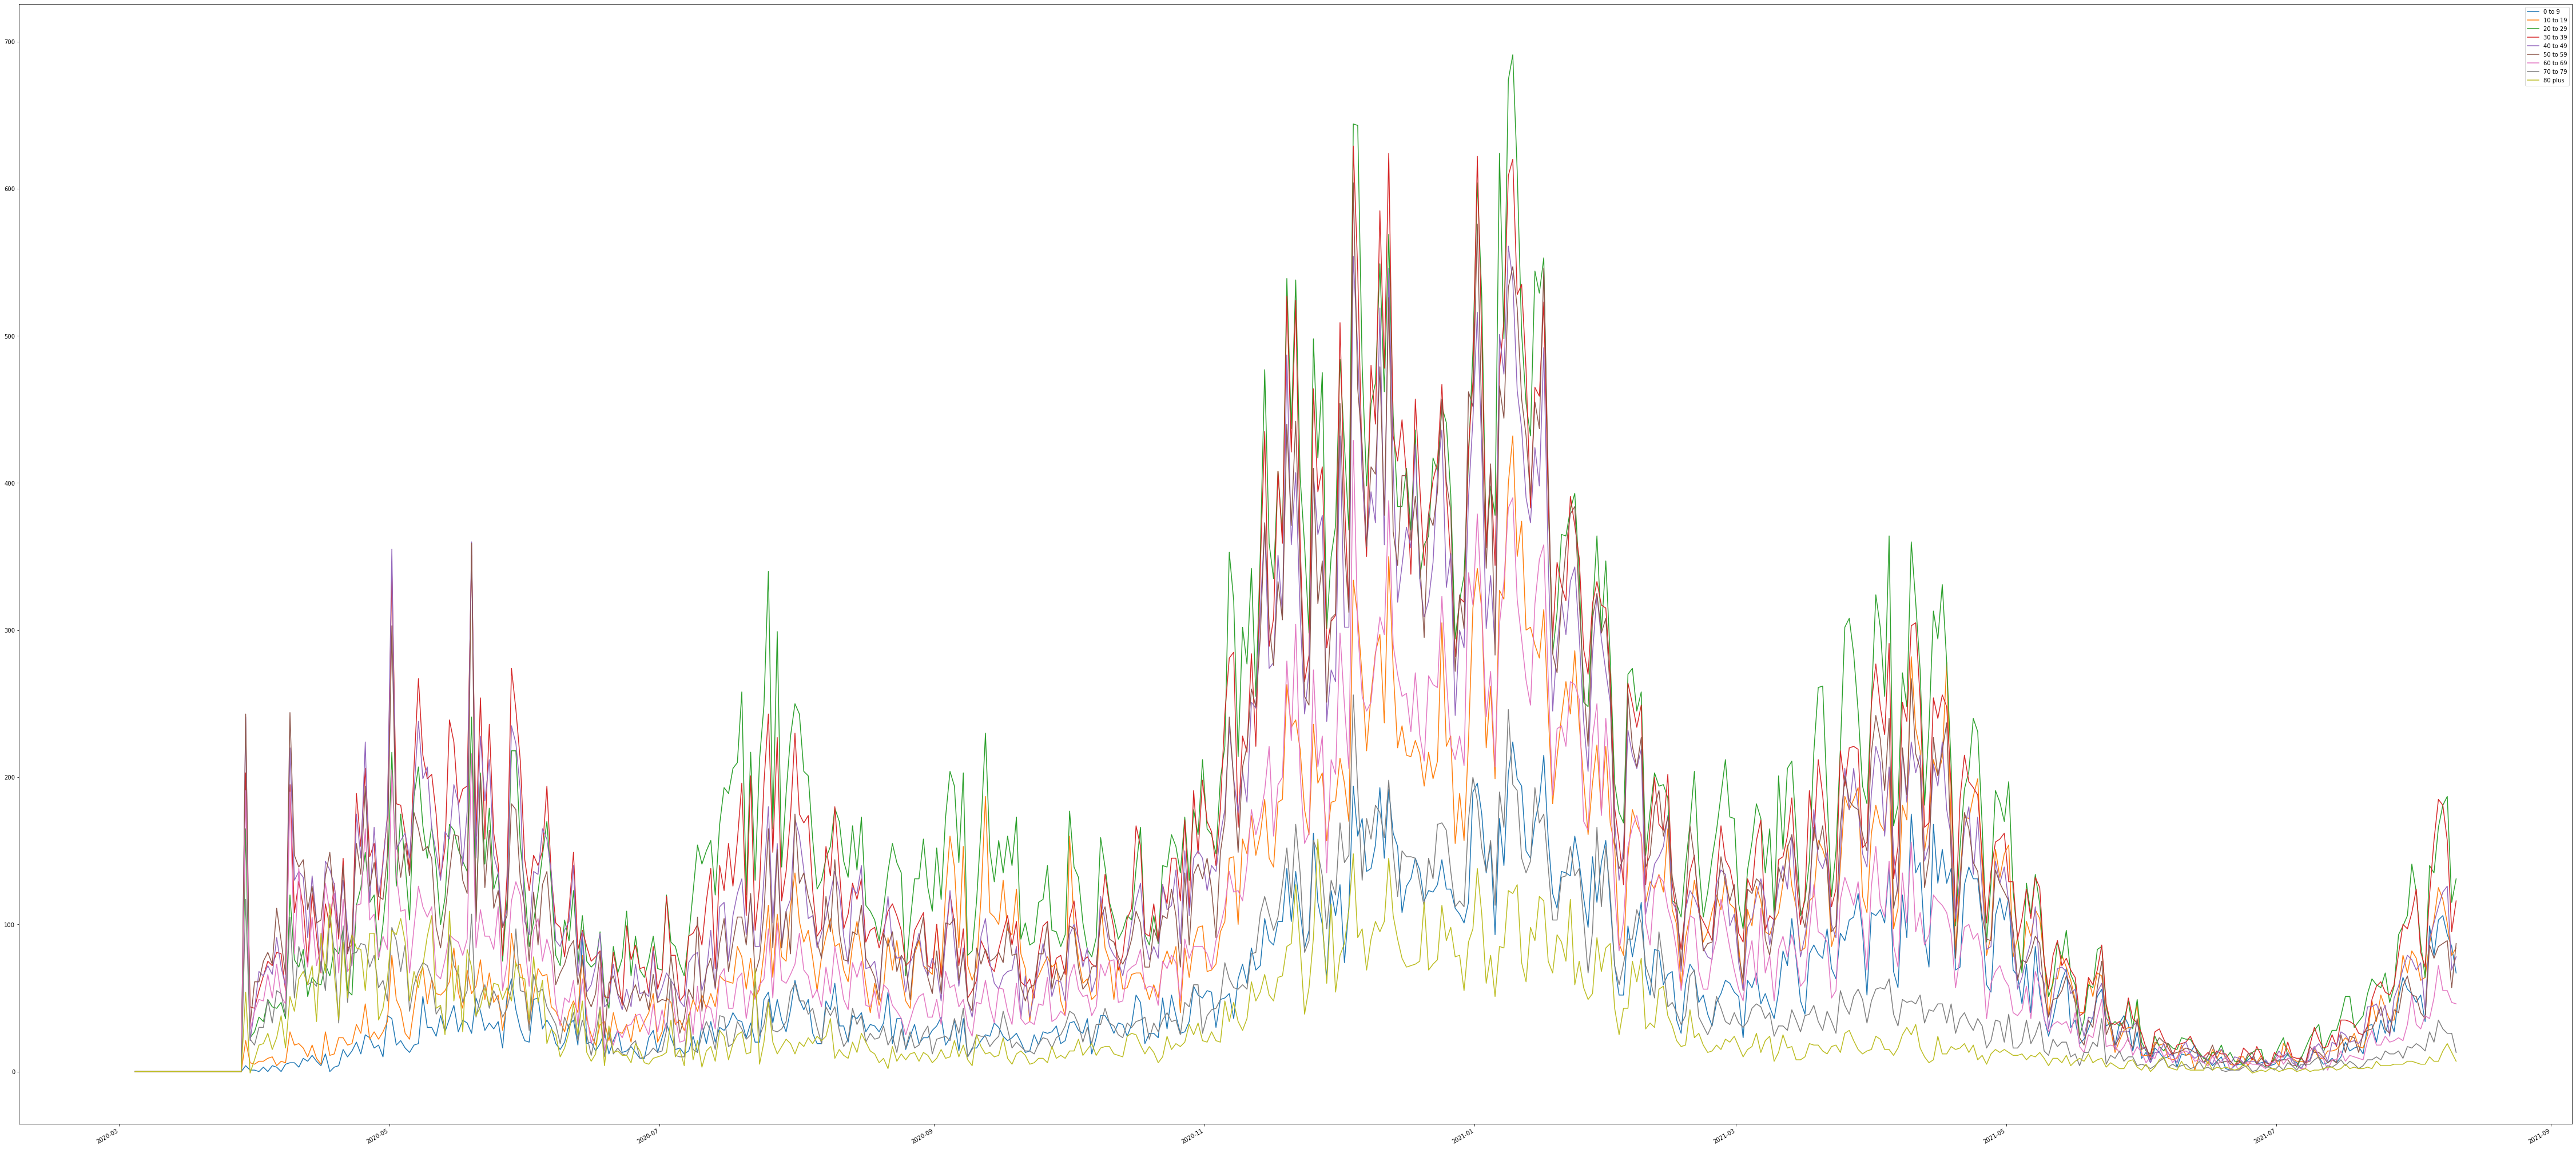

In [5]:
covdf.plot(figsize=(80, 40))

### That is an ugly chart!

<AxesSubplot:>

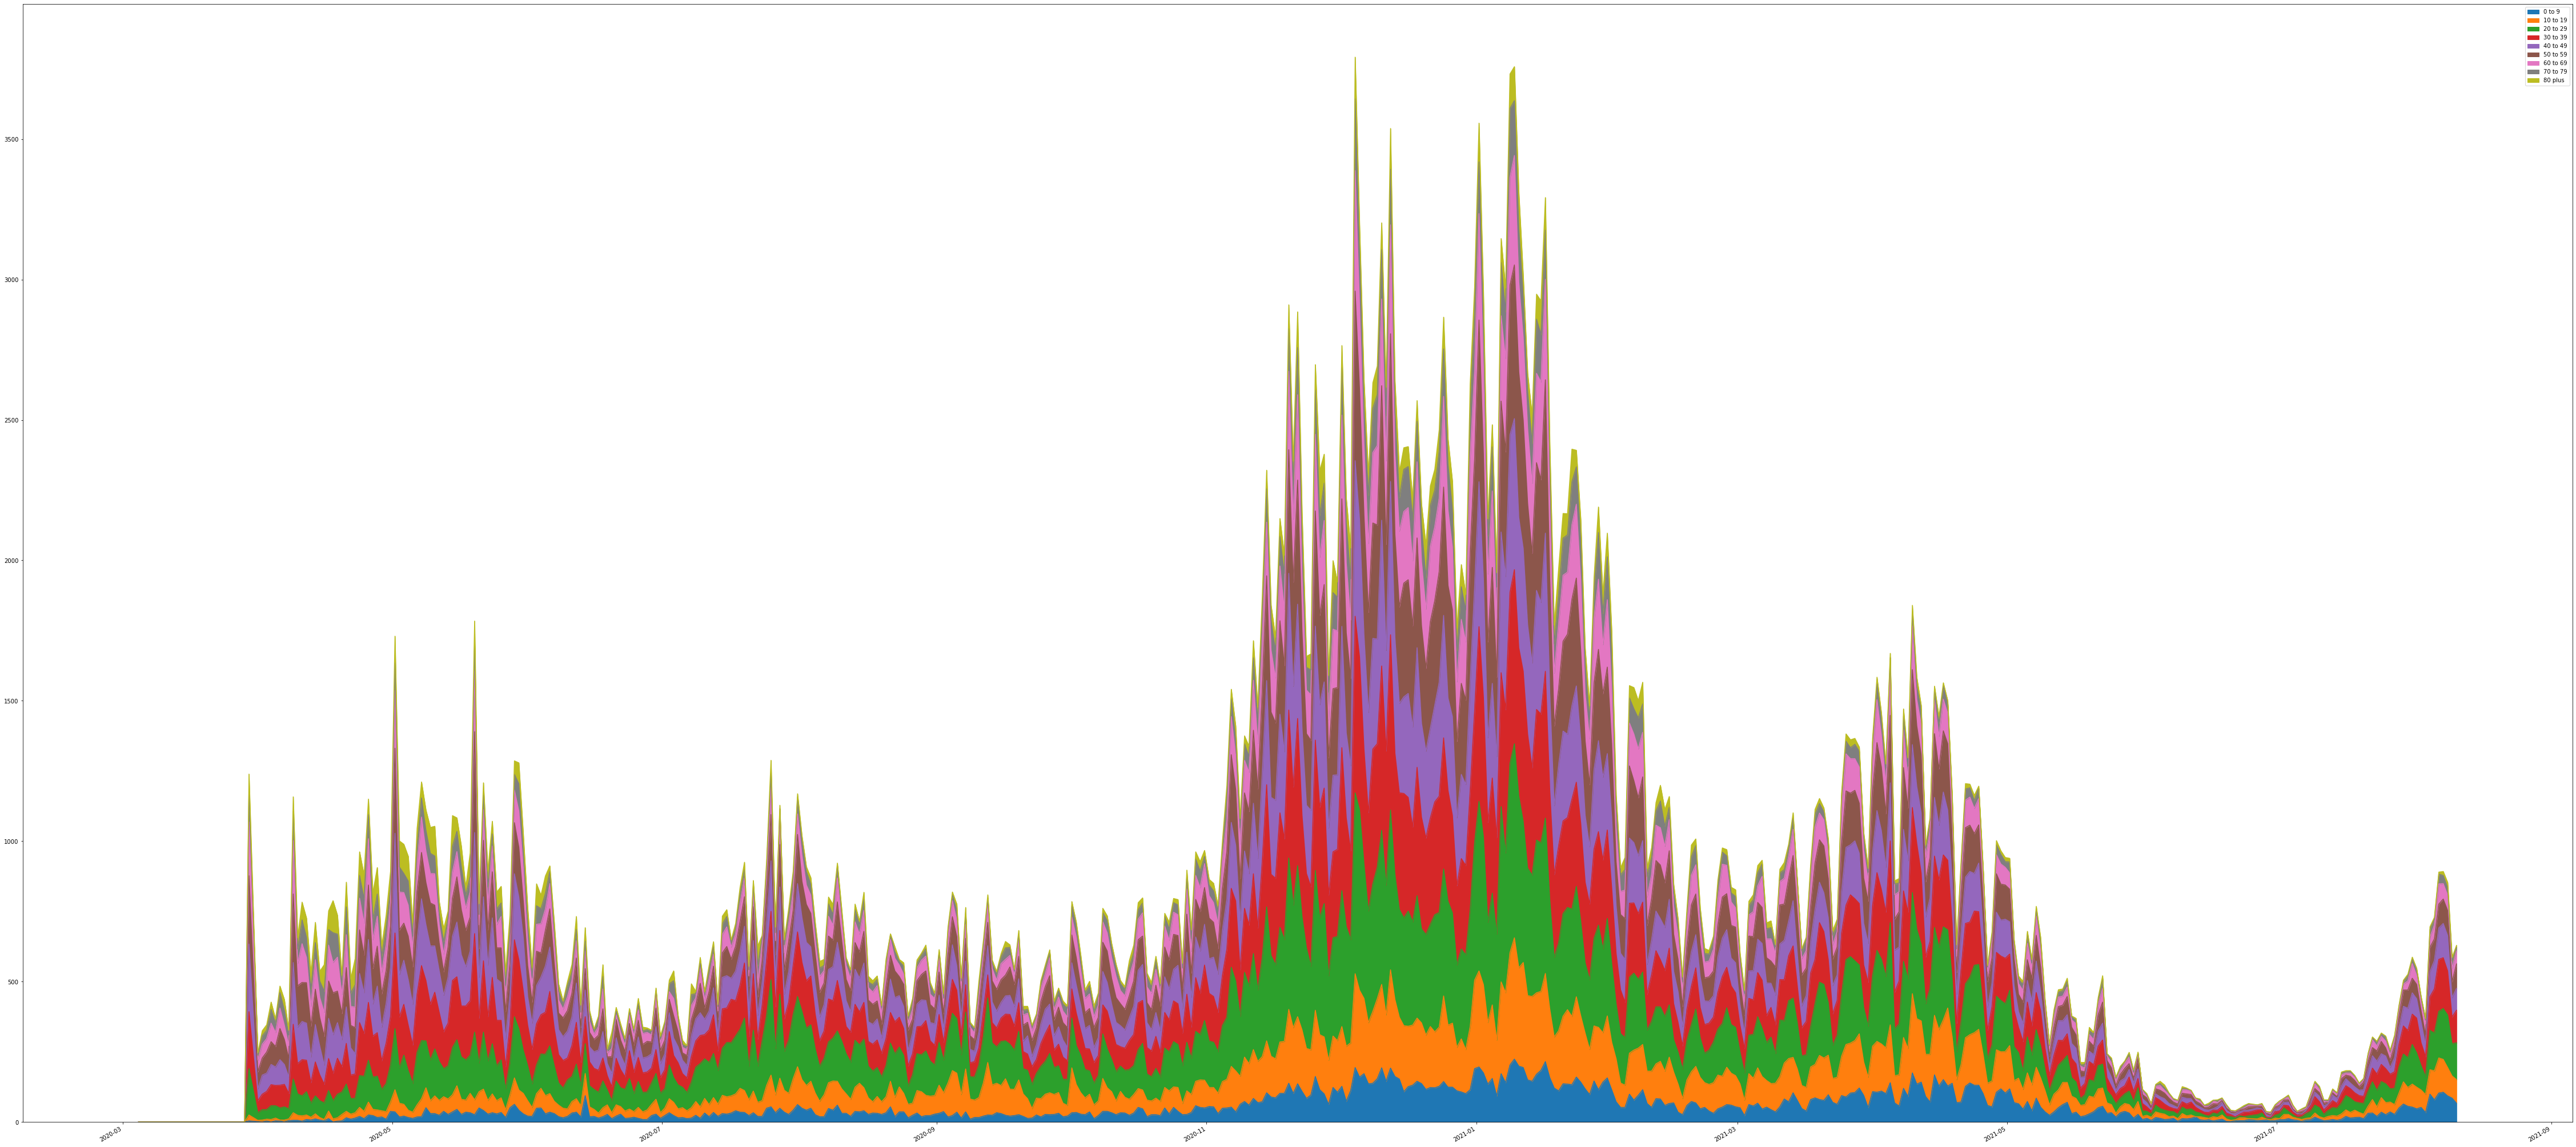

In [12]:
covdf[covdf["80 plus"] >= 0].plot.area(figsize=(80, 40))

## Is that better?

Maybe a little.

## Let's try something new!

Build dataframe with percent of new cases by age.

In [20]:
covdfp = pd.DataFrame(columns=[
    '0 to 9','10 to 19','20 to 29','30 to 39','40 to 49','50 to 59','60 to 69','70 to 79','80 plus'
])

for i in range(0, len(rawData['features'])):
    idx = pd.to_datetime(rawData['features'][i]['attributes']["ReportDate"] * 1000000)
    covdfp.loc[idx] = [
      0 if rawData['features'][i]['attributes']['CaseDelta'] == 0 else (rawData['features'][i]['attributes']['case0to9'] if i == 0 else (rawData['features'][i]['attributes']['case0to9'] - rawData['features'][i - 1]['attributes']['case0to9']) / rawData['features'][i]['attributes']['CaseDelta']),
      0 if rawData['features'][i]['attributes']['CaseDelta'] == 0 else (rawData['features'][i]['attributes']['case10to19'] if i == 0 else (rawData['features'][i]['attributes']['case10to19'] - rawData['features'][i - 1]['attributes']['case10to19']) / rawData['features'][i]['attributes']['CaseDelta']),
      0 if rawData['features'][i]['attributes']['CaseDelta'] == 0 else (rawData['features'][i]['attributes']['case20to29'] if i == 0 else (rawData['features'][i]['attributes']['case20to29'] - rawData['features'][i - 1]['attributes']['case20to29']) / rawData['features'][i]['attributes']['CaseDelta']),
      0 if rawData['features'][i]['attributes']['CaseDelta'] == 0 else (rawData['features'][i]['attributes']['case30to39'] if i == 0 else (rawData['features'][i]['attributes']['case30to39'] - rawData['features'][i - 1]['attributes']['case30to39']) / rawData['features'][i]['attributes']['CaseDelta']),
      0 if rawData['features'][i]['attributes']['CaseDelta'] == 0 else (rawData['features'][i]['attributes']['case40to49'] if i == 0 else (rawData['features'][i]['attributes']['case40to49'] - rawData['features'][i - 1]['attributes']['case40to49']) / rawData['features'][i]['attributes']['CaseDelta']),
      0 if rawData['features'][i]['attributes']['CaseDelta'] == 0 else (rawData['features'][i]['attributes']['case50to59'] if i == 0 else (rawData['features'][i]['attributes']['case50to59'] - rawData['features'][i - 1]['attributes']['case50to59']) / rawData['features'][i]['attributes']['CaseDelta']),
      0 if rawData['features'][i]['attributes']['CaseDelta'] == 0 else (rawData['features'][i]['attributes']['case60to69'] if i == 0 else (rawData['features'][i]['attributes']['case60to69'] - rawData['features'][i - 1]['attributes']['case60to69']) / rawData['features'][i]['attributes']['CaseDelta']),
      0 if rawData['features'][i]['attributes']['CaseDelta'] == 0 else (rawData['features'][i]['attributes']['case70to79'] if i == 0 else (rawData['features'][i]['attributes']['case70to79'] - rawData['features'][i - 1]['attributes']['case70to79']) / rawData['features'][i]['attributes']['CaseDelta']),
      0 if rawData['features'][i]['attributes']['CaseDelta'] == 0 else (rawData['features'][i]['attributes']['case80plus'] if i == 0 else (rawData['features'][i]['attributes']['case80plus'] - rawData['features'][i - 1]['attributes']['case80plus']) / rawData['features'][i]['attributes']['CaseDelta'])
  ]

<AxesSubplot:>

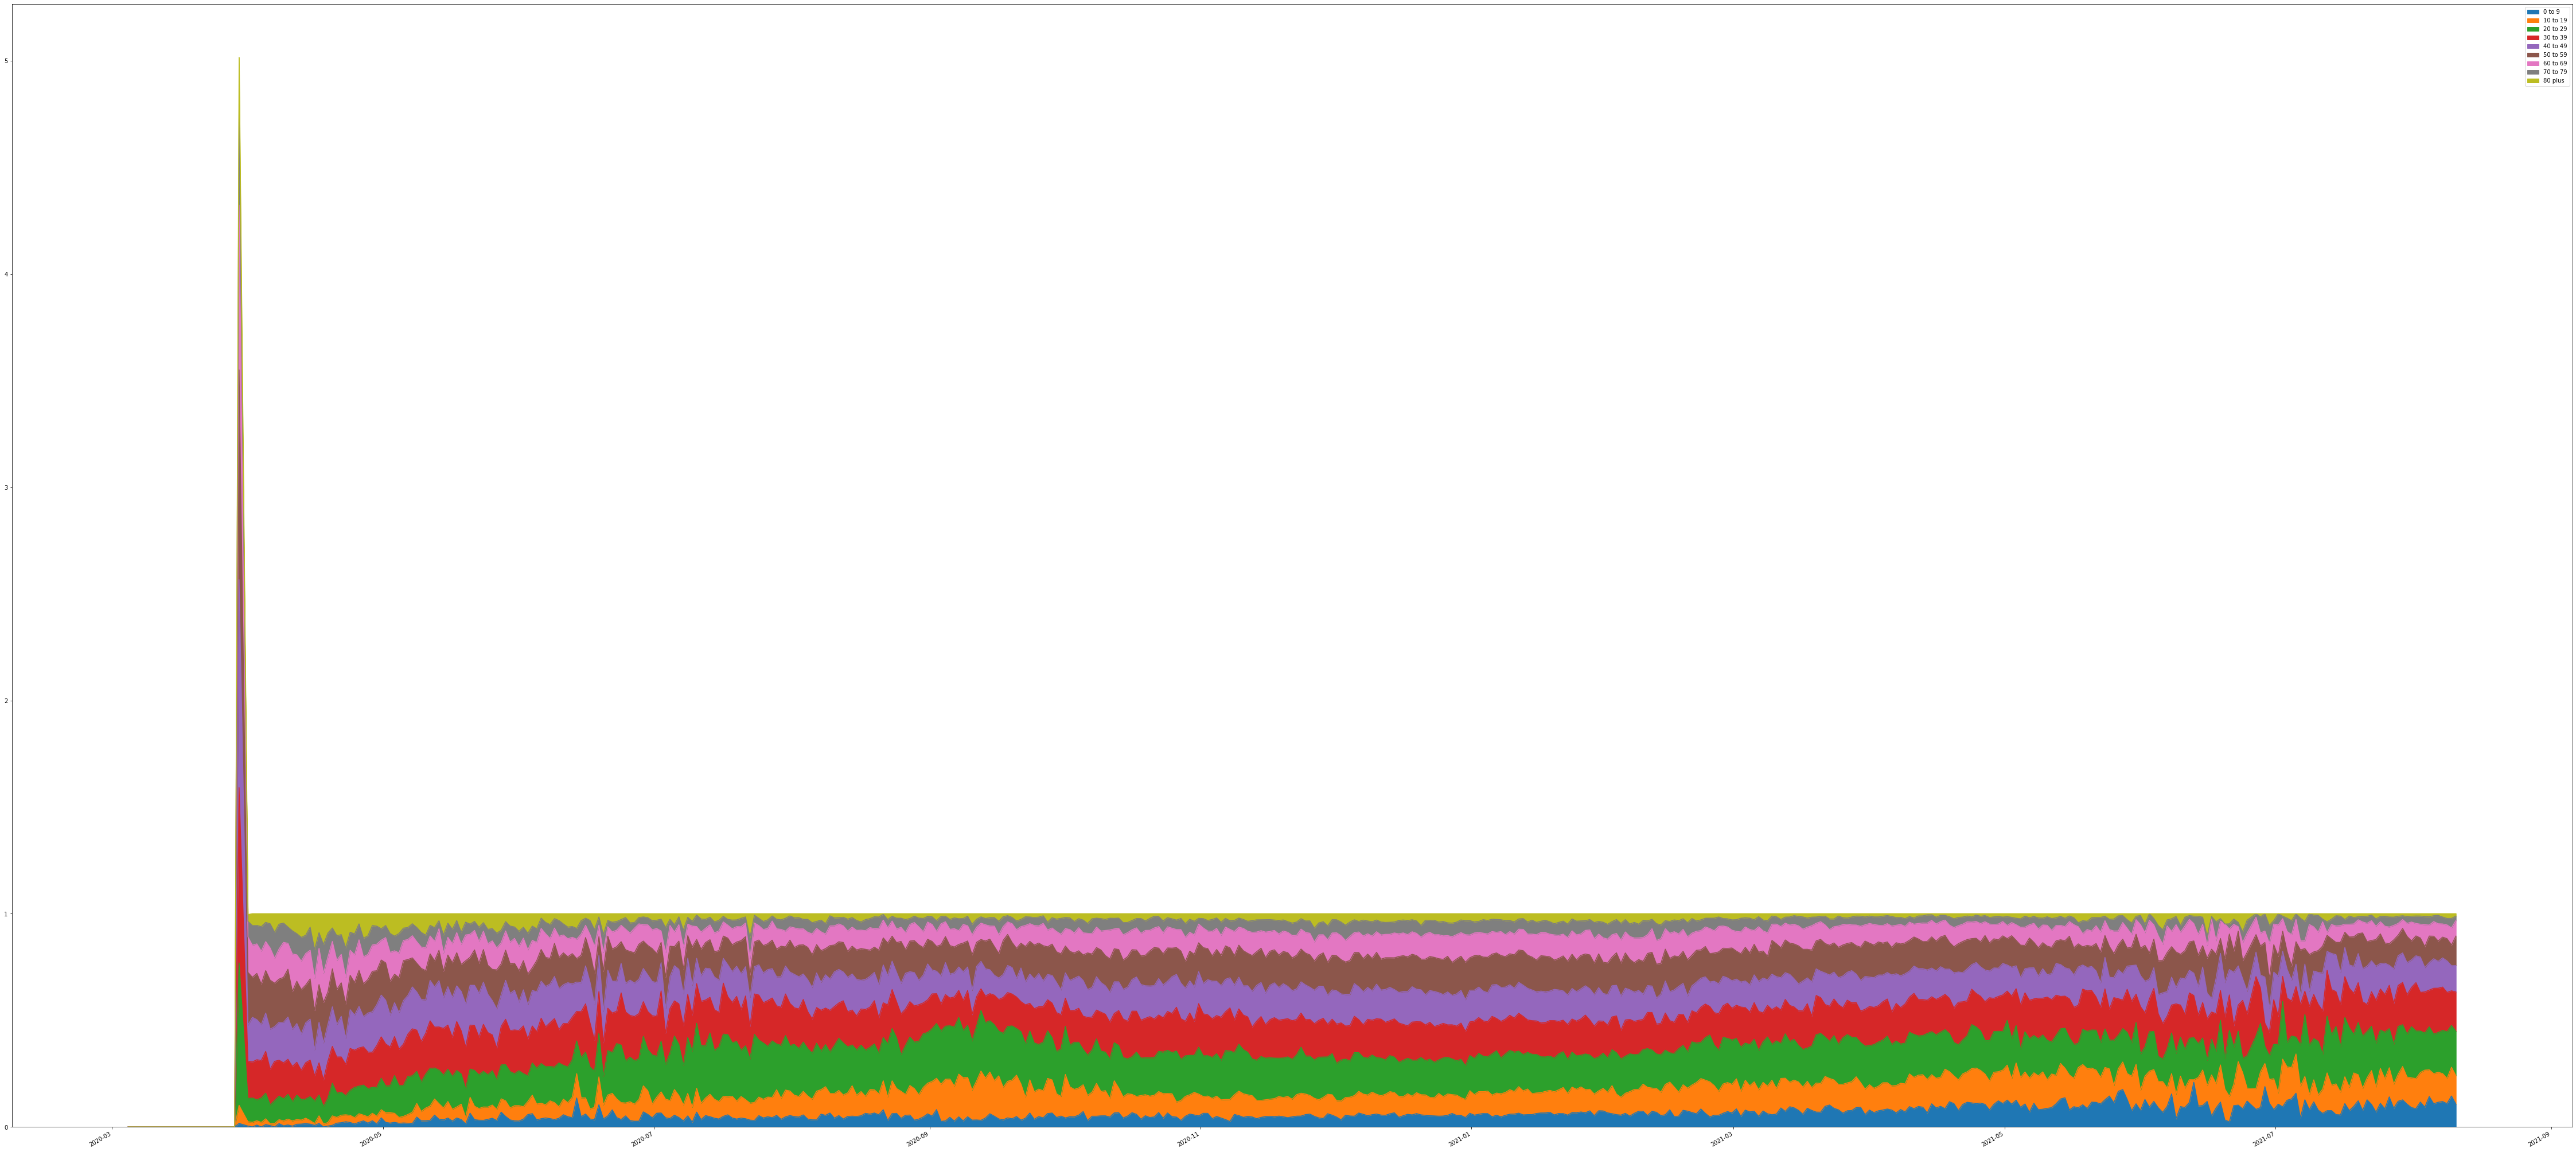

In [26]:
covdfp[covdfp["80 plus"] >= 0].plot.area(figsize=(80, 40))

## That's weird

In [28]:
covdfp[covdfp["80 plus"] >= 0].head(30).sum(axis=1)

2020-03-04 15:00:00    0.000000
2020-03-05 15:00:00    0.000000
2020-03-06 15:00:00    0.000000
2020-03-07 15:00:00    0.000000
2020-03-08 14:00:00    0.000000
2020-03-09 14:00:00    0.000000
2020-03-10 14:00:00    0.000000
2020-03-11 14:00:00    0.000000
2020-03-12 14:00:00    0.000000
2020-03-13 14:00:00    0.000000
2020-03-14 14:00:00    0.000000
2020-03-15 14:00:00    0.000000
2020-03-16 14:00:00    0.000000
2020-03-17 14:00:00    0.000000
2020-03-18 14:00:00    0.000000
2020-03-19 14:00:00    0.000000
2020-03-20 14:00:00    0.000000
2020-03-21 14:00:00    0.000000
2020-03-22 14:00:00    0.000000
2020-03-23 14:00:00    0.000000
2020-03-24 14:00:00    0.000000
2020-03-25 14:00:00    0.000000
2020-03-26 14:00:00    0.000000
2020-03-27 14:00:00    0.000000
2020-03-28 14:00:00    0.000000
2020-03-29 14:00:00    5.016194
2020-03-31 14:00:00    0.995951
2020-04-01 14:00:00    1.000000
2020-04-02 14:00:00    1.000000
2020-04-03 14:00:00    1.000000
dtype: float64

In [31]:
covdfp.loc['2020-03-29 14:00:00'].sum()

5.016194331983805

In [37]:
covdfp[(covdfp.sum(axis=1) <= 1) & (covdfp["80 plus"] >= 0)]

0 to 9  10 to 19  20 to 29  30 to 39  40 to 49  \
2020-03-04 15:00:00         0         0         0         0         0   
2020-03-05 15:00:00       0.0       0.0       0.0       0.0       0.0   
2020-03-06 15:00:00         0         0         0         0         0   
2020-03-07 15:00:00         0         0         0         0         0   
2020-03-08 14:00:00       0.0       0.0       0.0       0.0       0.0   
...                       ...       ...       ...       ...       ...   
2021-08-06 14:00:00   0.11573  0.140449  0.186517  0.207865  0.125843   
2021-08-07 14:00:00  0.118834  0.131166  0.202915  0.202915  0.136771   
2021-08-08 14:00:00  0.109027  0.118406  0.219226  0.184056  0.147714   
2021-08-09 14:00:00  0.145051  0.134812  0.196246  0.162116  0.117747   
2021-08-10 14:00:00  0.106518  0.133545  0.208267   0.18442  0.124006   

                     50 to 59  60 to 69  70 to 79   80 plus  
2020-03-04 15:00:00         0         0         0         0  
2020-03-05 15:00:00       0.0       0.0       0.0       0.0  
2020-03-06 15:00:00         0         0         0         0  
2020-03-07 15:00:00         0         0         0         0  
2020-03-08 14:00:00       0.0       0.0       0.0       0.0  
...                       ...       ...       ...       ...  
2021-08-06 14:00:00  0.095506  0.080899  0.039326  0.007865  
2021-08-07 14:00:00  0.097534  0.061659  0.032511  0.015695  
2021-08-08 14:00:00  0.104338  0.064478  0.030481  0.022274  
2021-08-09 14:00:00   0.09727  0.080205  0.044369  0.022184  
2021-08-10 14:00:00  0.138315  0.073132  0.020668  0.011129  

[488 rows x 9 columns]

<AxesSubplot:>

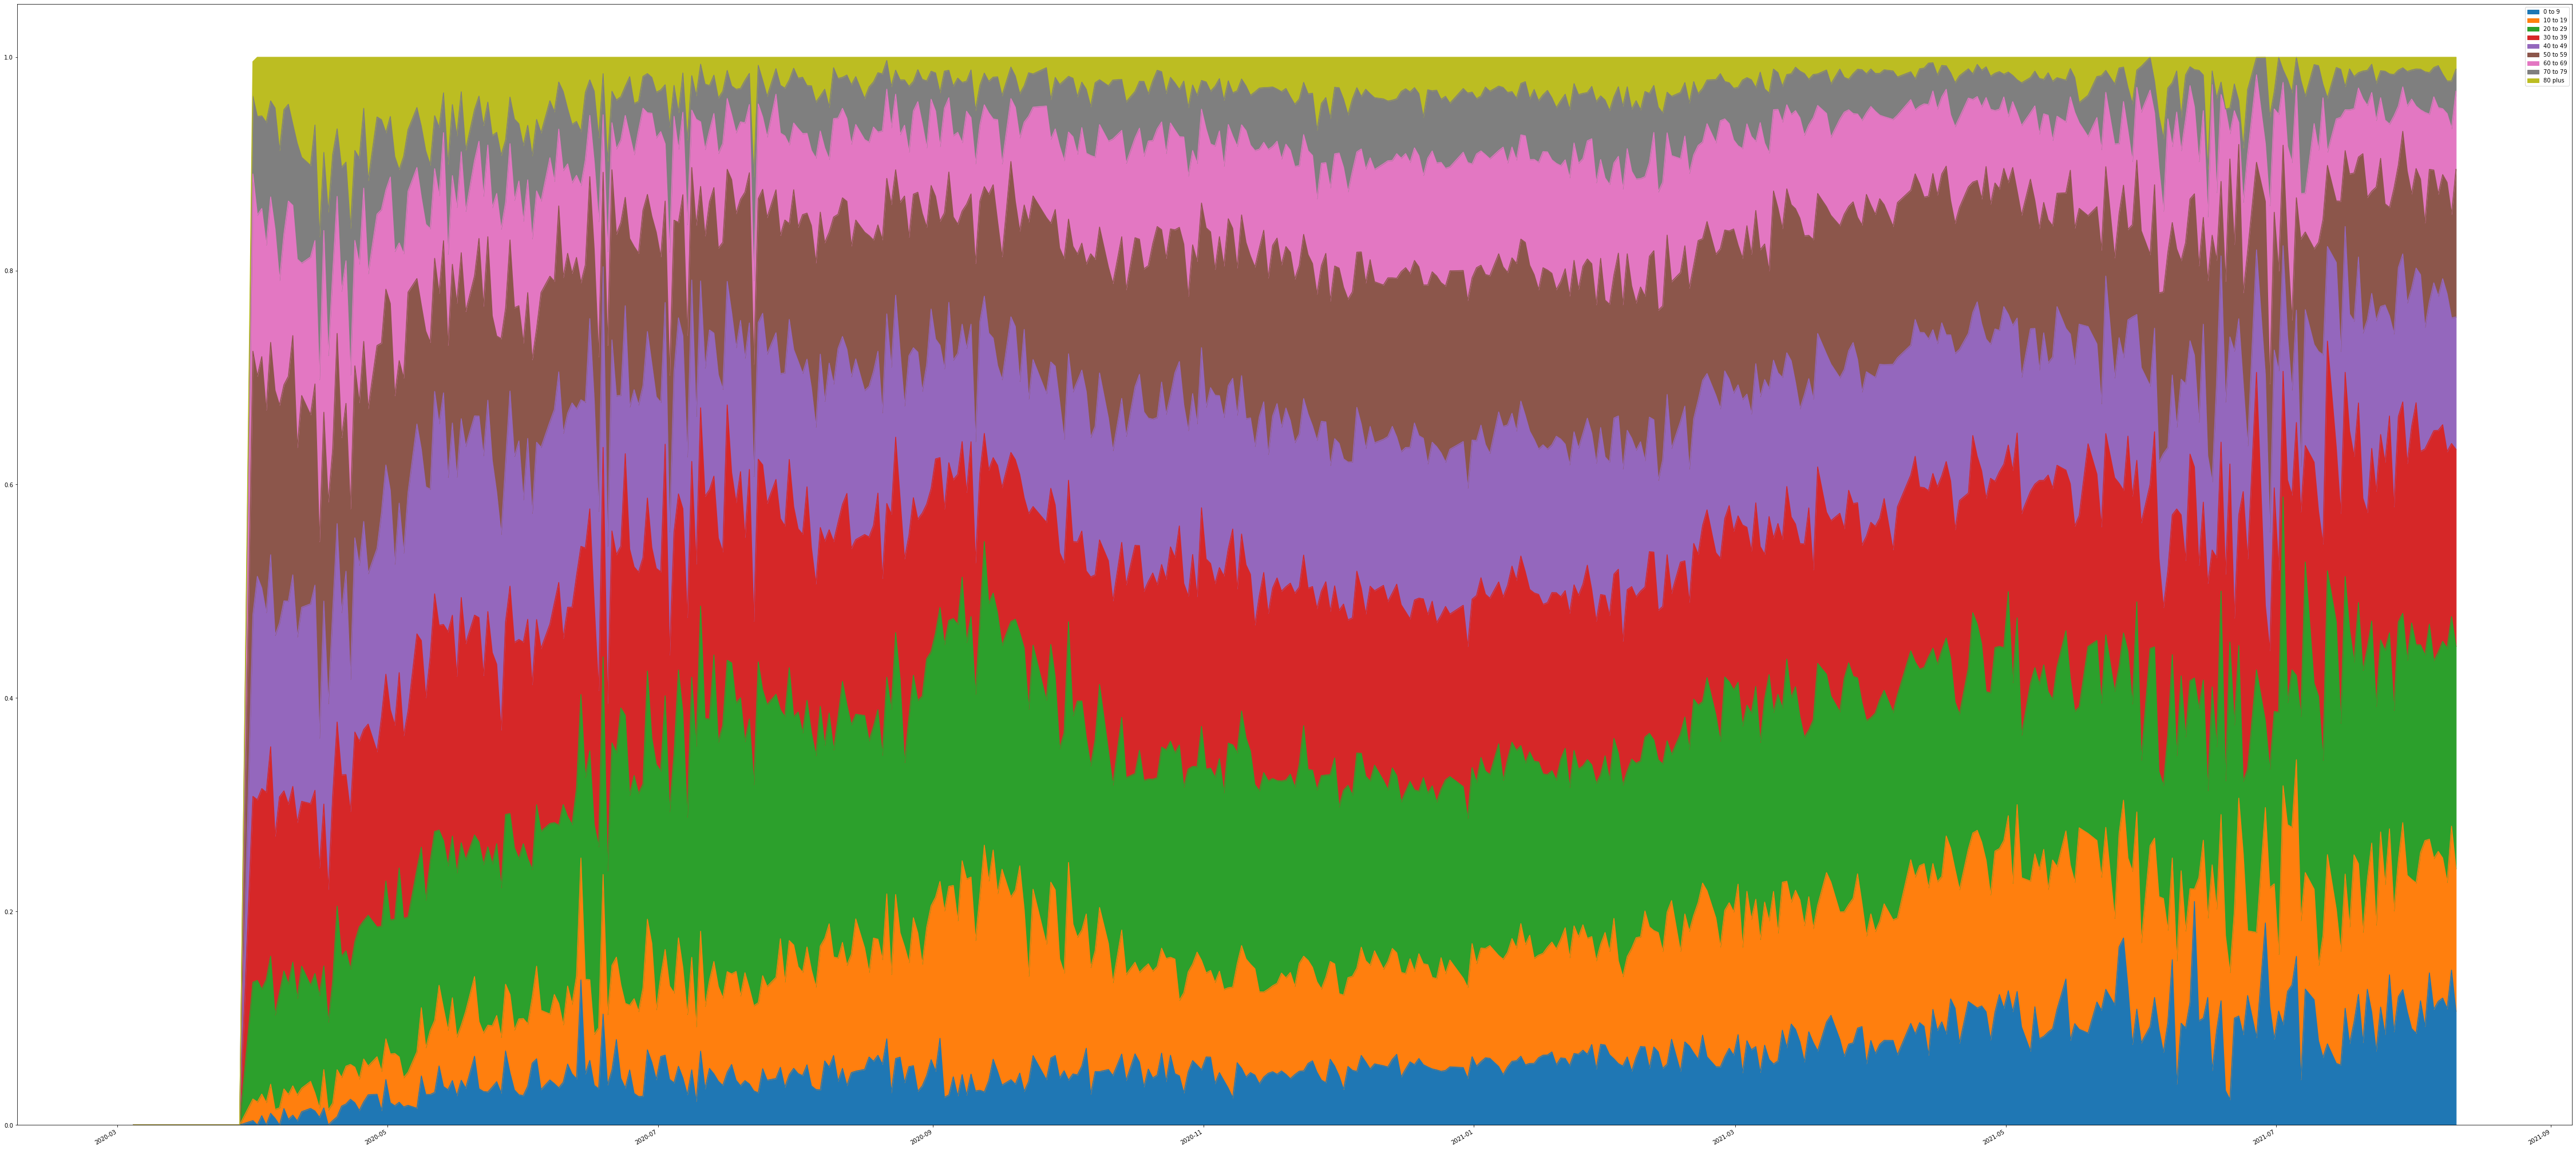

In [38]:
covdfp[(covdfp.sum(axis=1) <= 1) & (covdfp["80 plus"] >= 0)].plot.area(figsize=(80, 40))